## 📘 **Notebook 00 - Exploratory Analysis of the PlantVillage Dataset**


### 🎯 Project Objective
This project aims to develop a robust system for **automatic plant disease detection from leaf images** using Deep Learning techniques. The goal is to provide a reliable tool to assist farmers, researchers, and agronomists in the early identification of plant diseases.

The model is trained and evaluated on the **PlantVillage dataset**, which contains over 50,000 images of healthy and diseased plant leaves across multiple crop types such as tomato, apple, potato, grape, corn, and more.

### 🔍 Project Pipeline Overview
1. **Data exploration and visualization**: Analyze class distributions, check image quality, detect class imbalances.
2. **Data preparation**: Clean images, resize, and split into train/validation/test sets.
3. **Model training**: Implement and train both a custom CNN and a pre-trained VGG16 with fine-tuning.
4. **Performance evaluation**: Accuracy, confusion matrix, and classification report.
5. **Model interpretability**: Use Grad-CAM to visualize model attention areas on the leaf.

### 🧠 Technologies Used
- **TensorFlow / Keras**: For model training (CNN & VGG16)
- **Matplotlib / Seaborn**: For visualizations and plots
- **Scikit-learn**: For metrics and evaluation reports
- **OpenCV**: For image processing
- **Grad-CAM**: For visual interpretability of CNN predictions

### ⚙️ Methodology
The project follows a well-structured **machine learning pipeline** with clear separation between phases: data exploration, preprocessing, training, evaluation. It applies best practices such as data augmentation, model checkpointing, early stopping, and fine-tuning of pre-trained models.

### 📌 Main Deliverables
- 📊 Detailed exploratory analysis
- 📦 Trained models (Custom CNN & VGG16)
- 📈 Learning curves and performance metrics
- 🔥 Visual interpretation with Grad-CAM
- 🧪 Robust testing and evaluation notebook

---

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

**📁 Définir le chemin vers les données originales**

In [2]:
RAW_DATA_PATH = "data/raw/plantvillage_dataset/color"

**🔍 1. List available classes**  


In [3]:
classes = [d for d in os.listdir(RAW_DATA_PATH) if os.path.isdir(os.path.join(RAW_DATA_PATH, d))]
print(f"Nombre de classes : {len(classes)}")
print("Exemples de classes :", classes[:5])

Nombre de classes : 38
Exemples de classes : ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


**📊 2. Count images per class**  


In [4]:
image_counts = {}
for cls in classes:
    folder = os.path.join(RAW_DATA_PATH, cls)
    image_counts[cls] = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])

**➕ Create a DataFrame summary**  


In [5]:
count_df = pd.DataFrame.from_dict(image_counts, orient='index', columns=['Nombre d\'images'])
count_df = count_df.sort_values("Nombre d'images", ascending=False)

**📉 3. Visualize class distribution**  


C:\Users\cheri\AppData\Local\Temp\ipykernel_27428\3712438542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_df.index, y=count_df["Nombre d'images"], palette="viridis")
C:\Users\cheri\AppData\Local\Temp\ipykernel_27428\3712438542.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cheri\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


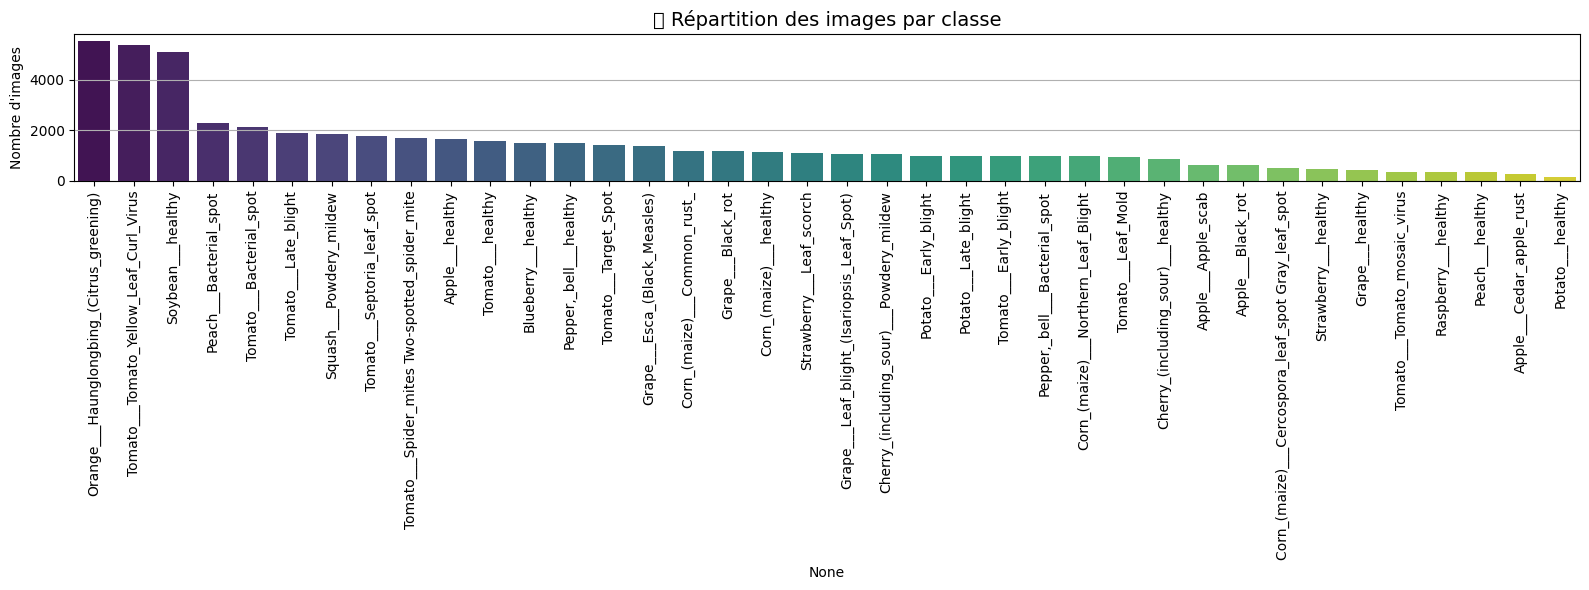

In [6]:
plt.figure(figsize=(16,6))
sns.barplot(x=count_df.index, y=count_df["Nombre d'images"], palette="viridis")
plt.title("📊 Répartition des images par classe", fontsize=14)
plt.ylabel("Nombre d'images")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**📐 4. Check image resolutions**  


In [7]:
from collections import Counter

resolutions = []
for cls in classes:
    folder = os.path.join(RAW_DATA_PATH, cls)
    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))][:20]  # échantillon
    for img in images:
        try:
            with Image.open(os.path.join(folder, img)) as im:
                resolutions.append(im.size)
        except:
            continue

res_count = Counter(resolutions)
print("Top résolutions :")
for res, count in res_count.most_common(5):
    print(f"{res}: {count} images")

Top résolutions :
(256, 256): 760 images


**🖼️ 5. Visualize sample images per class**  


C:\Users\cheri\AppData\Local\Temp\ipykernel_27428\956022852.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


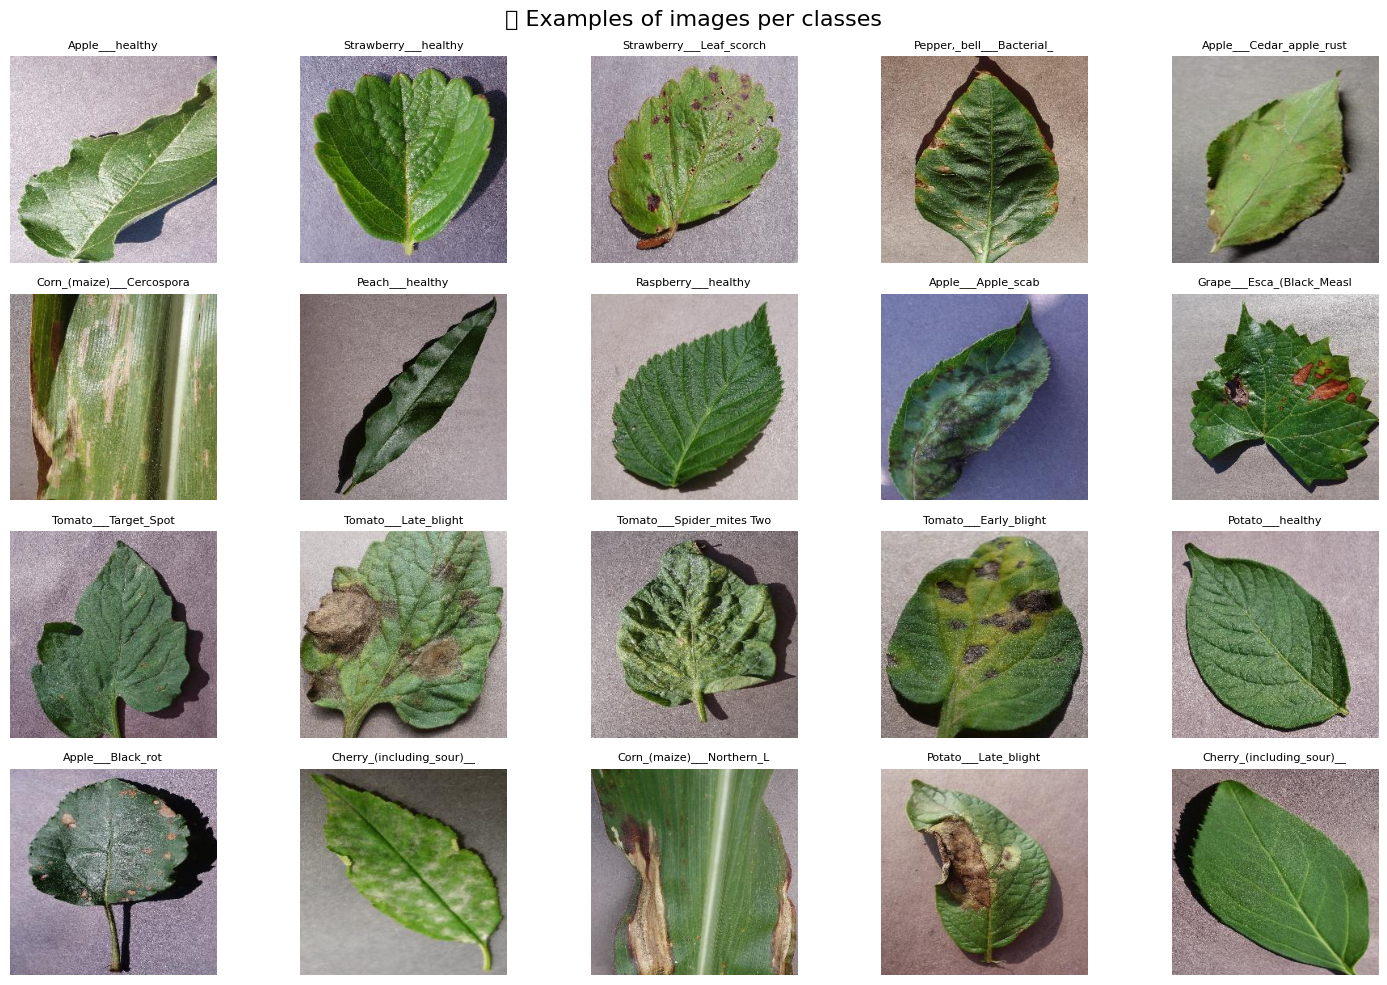

In [10]:
import random

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(15,10))
fig.suptitle("🔍 Examples of images per classes", fontsize=16)

for ax, cls in zip(axs.flat, random.sample(classes, 20)):
    folder = os.path.join(RAW_DATA_PATH, cls)
    img_file = random.choice([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
    img = Image.open(os.path.join(folder, img_file))
    ax.imshow(img)
    ax.set_title(cls[:25], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()



In [11]:
print("✅ Exploratory data analysis completed.")


✅ Exploratory data analysis completed.
